In [9]:
from ultralytics import YOLO
import os
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt


0: 480x640 (no detections), 488.8ms
Speed: 12.2ms preprocess, 488.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


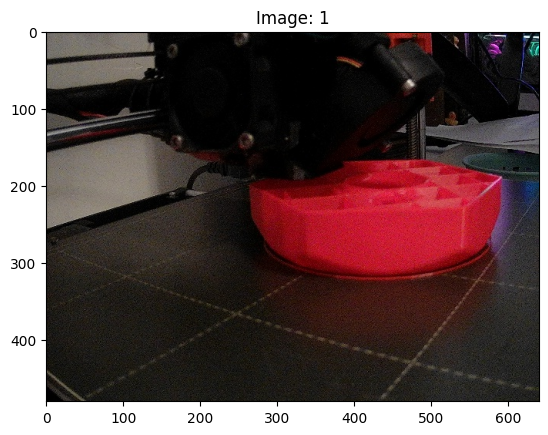


0: 384x640 1 spaghetti, 388.5ms
Speed: 2.3ms preprocess, 388.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Image: WIN_20251118_13_17_09_Pro.jpg, Class: 0, Confidence: 0.31


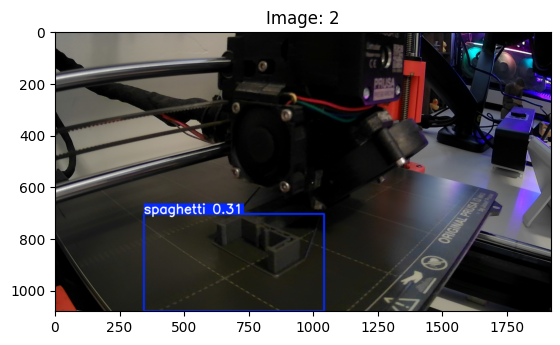


0: 384x640 1 spaghetti, 450.2ms
Speed: 1.8ms preprocess, 450.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Image: WIN_20251120_23_49_03_Pro.jpg, Class: 0, Confidence: 0.65


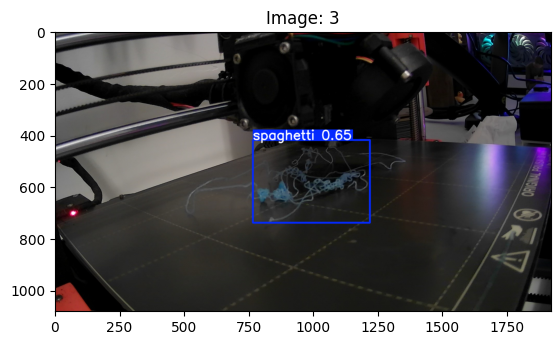


0: 384x640 2 spaghettis, 412.8ms
Speed: 1.7ms preprocess, 412.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Image: WIN_20251120_23_49_58_Pro.jpg, Class: 0, Confidence: 0.51
Image: WIN_20251120_23_49_58_Pro.jpg, Class: 0, Confidence: 0.27


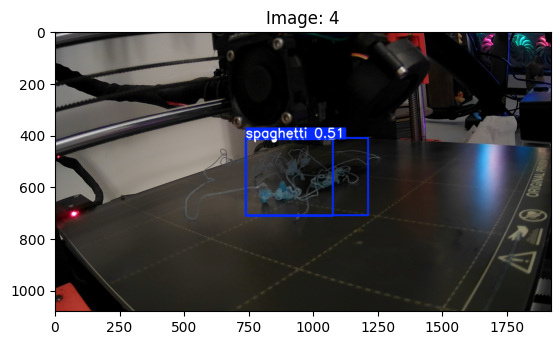


0: 384x640 1 spaghetti, 376.8ms
Speed: 1.4ms preprocess, 376.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Image: WIN_20251120_23_53_44_Pro.jpg, Class: 0, Confidence: 0.57


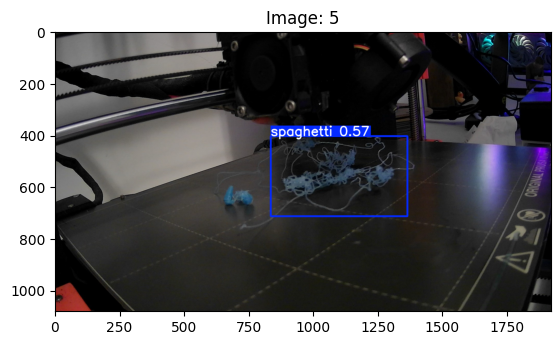

In [15]:
model = YOLO("best.pt")

# loop through images in a directory and make predictions
image_dir = "sample_images"
for index, image_name in enumerate(os.listdir(image_dir)):
    if image_name.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_dir, image_name)
        # load image
        image = cv2.imread(image_path)
        # make predictions
        results = model(image)
        # display results
        for result in results:
            boxes = result.boxes
            for box in boxes:
                cls = int(box.cls[0])
                conf = box.conf[0]
                xyxy = box.xyxy[0].cpu().numpy()
                print(f"Image: {image_name}, Class: {cls}, Confidence: {conf:.2f}")
        annotation = results[0].plot()
        plt.imshow(cv2.cvtColor(annotation, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {index+1}")
        plt.show()

# Explanation of results
## Image 1
Perfectly good print, no errors detected
## Image 2
Infill pattern triggered a detection, despite not being an error, however the low confidence would not have triggered shutdown command
## Image 3, 4, and 5
Various examples of correct spaghetti detection